# Business Understanding

## Problem Statement
A real estate company aims to improve its pricing strategy by developing an accurate house price prediction model. The current process lacks a data-driven approach, leading to potential pricing inefficiencies in the housing market. By leveraging historical housing data, the company wants to establish a reliable method for estimating median home values.

## Objective
Develop a robust regression model to predict `MEDV` (Median Value of owner-occupied homes in $1000s) using various housing features including:
- Crime rate (`CRIM`)
- Number of rooms (`RM`)
- Neighborhood characteristics (`INDUS`, `LSTAT`)
- Property tax rates (`TAX`)
- And other relevant factors

## Success Metrics
The model will be evaluated based on:
- **RMSE (Root Mean Squared Error)**: Target < 3.0 (Lower values indicate better performance)
- **R² Score**: Target > 0.85 (Higher values indicate better explanatory power)

## Data Overview
The dataset contains:
- 506 entries (housing instances)
- 14 features (12 numerical, 2 categorical)
- Target variable: `MEDV` (continuous numerical values ranging from $5k to $50k)

Key observations from preliminary analysis:
- All features have complete data (no missing values)
- Wide ranges in feature values (e.g., crime rate varies from 0.006 to 88.98)
- Potential outliers in maximum values for several features

# Data Exploration(EDA)

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import shap

## load dataset

In [185]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [187]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [188]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [189]:
print(df.dtypes)

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object


## check duplicates

In [190]:
print(df.duplicated().sum())

0


## heatmap to import correlation values

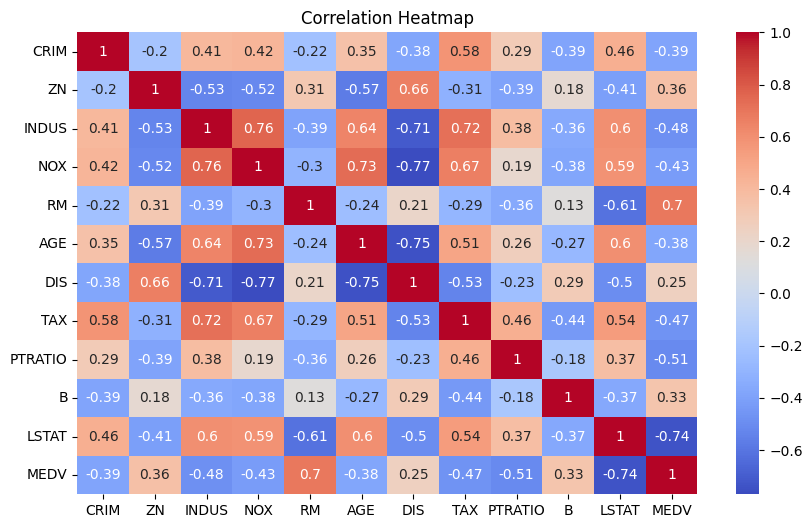

In [191]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## distrubution nummeraical values

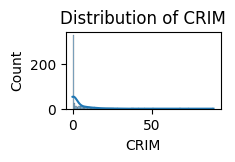

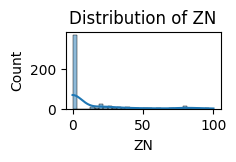

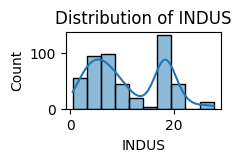

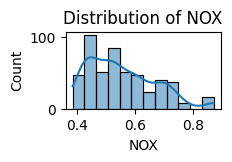

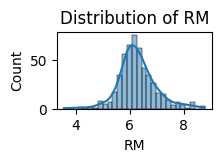

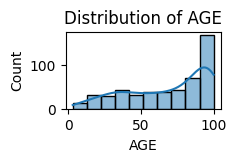

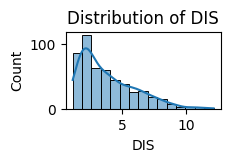

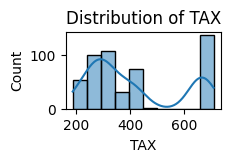

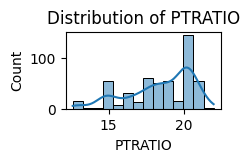

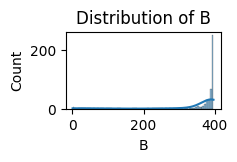

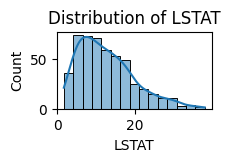

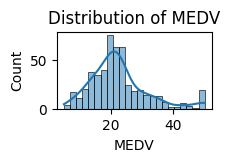

In [192]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(2, 1))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [193]:
df['CHAS'] = df['CHAS'].cat.codes.astype(int)
df['RAD'] = df['RAD'].cat.codes.astype(int)

In [194]:
for column in df.columns:
    skewness = df[column].skew()
    print(f"{column}: {skewness}")

CRIM: 5.223148798243851
ZN: 2.2256663227354307
INDUS: 0.29502156787351164
CHAS: 3.405904172058746
NOX: 0.7293079225348787
RM: 0.40361213328874385
AGE: -0.5989626398812962
DIS: 1.0117805793009007
RAD: 0.23747960872847515
TAX: 0.669955941795016
PTRATIO: -0.8023249268537809
B: -2.8903737121414492
LSTAT: 0.9064600935915367
MEDV: 1.1080984082549072


## check outliers

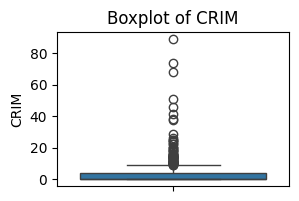

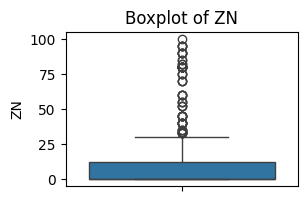

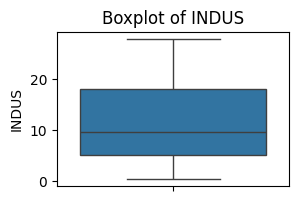

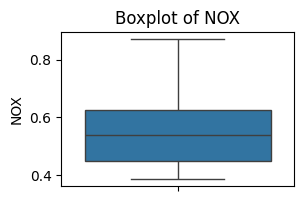

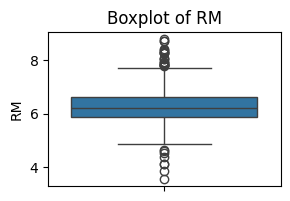

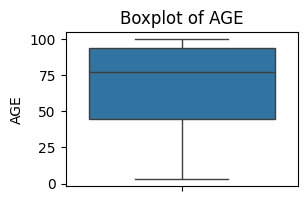

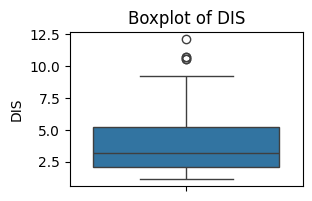

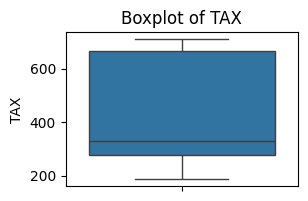

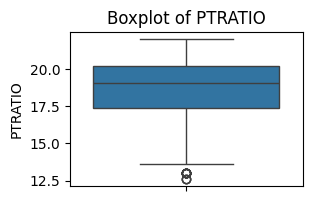

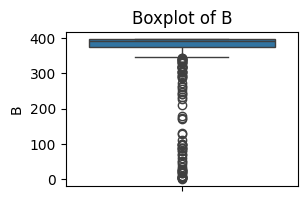

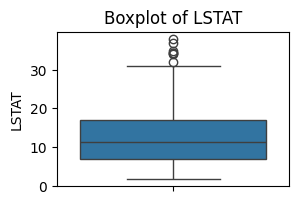

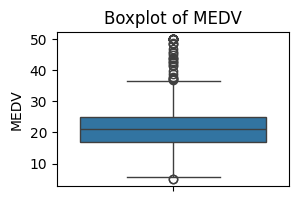

In [195]:
for col in num_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Data Preparation

### NO missing values

In [196]:
#  - Apply log transformation to skewed features (`CRIM`, `ZN`).
for col in ['CRIM', 'ZN']:
    df[col] = np.log1p(df[col])  # log1p(x) = log(1 + x), handles 0 safely

In [197]:
# train test split 80 for training 20 for testing
x=df.drop('MEDV',axis=1)
y=df['MEDV']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [198]:
# try standred scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

In [199]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()}


In [200]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics for regression
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R² Score": r2
    })

# Show results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


           Model      RMSE       MAE  R² Score
0  Decision Tree  3.215496  2.376471  0.859009
1  Random Forest  3.070451  2.102441  0.871442
2        XGBoost  2.591416  1.833045  0.908426


##   - Perform hyperparameter tuning (RandomizedSearchCV) on the best model.  


In [201]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}
xgb = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,           # Number of parameter combinations to try
    cv=5,                # 5-fold cross-validation
    verbose=2,
    scoring='r2',        # Since you're optimizing regression
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
# Best parameters
print("Best Hyperparameters:")
print(random_search.best_params_)

# Predict with best model
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Performance After Tuning:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters:
{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}

 Performance After Tuning:
RMSE: 2.6620
MAE: 1.9297
R² Score: 0.9034


# Evalution

## after comparing i found the best model is XGBoost

In [202]:
importances = best_xgb.feature_importances_
feature_names = X_train.columns

# Create DataFrame for plotting
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


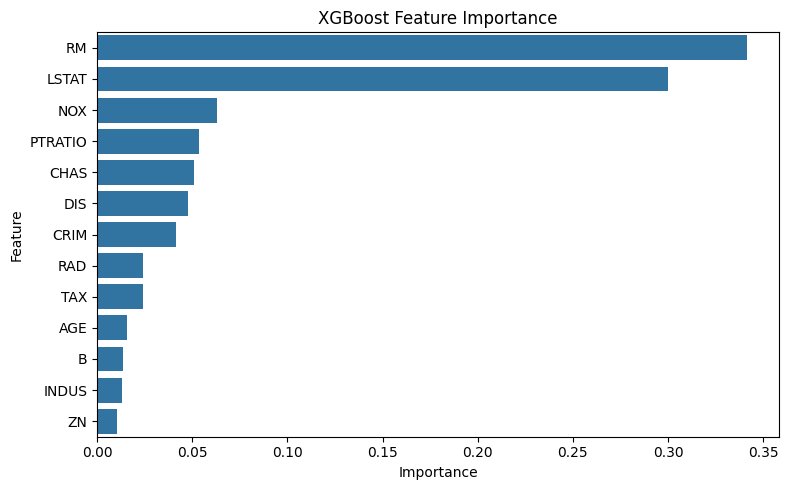

In [203]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

##  Which features have the highest impact on price?
### is RM

##     - Use `shap.summary_plot()` to explain model decisions.  


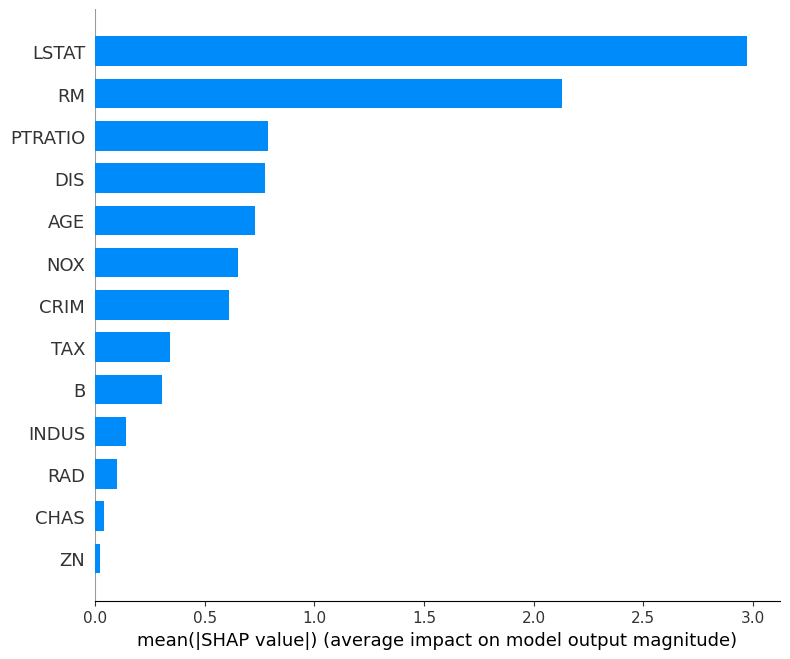

In [204]:
explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test, plot_type="bar")


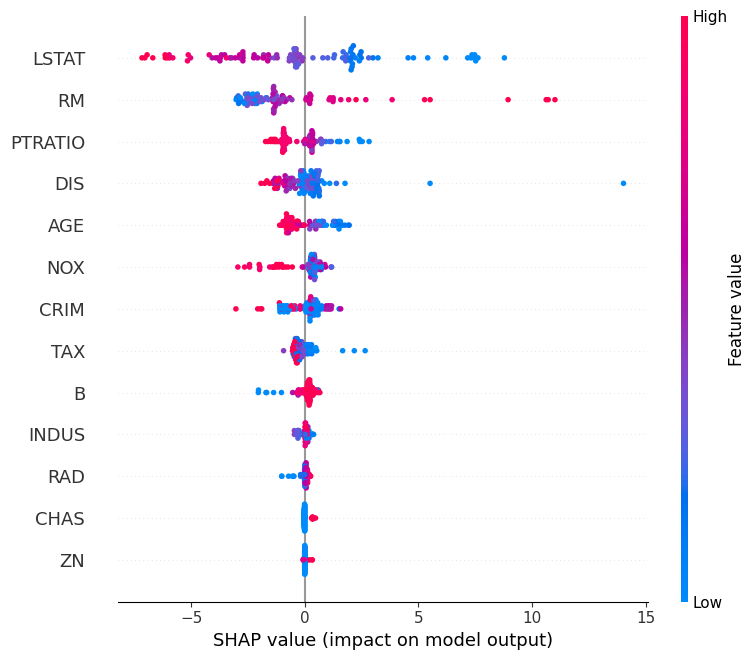

In [205]:
shap.summary_plot(shap_values, X_test)


##     - Do the results make business sense?  
### answer : Yes, if the top features logically relate to price or value and follow expected trends.


# Deployment

In [206]:
import pandas as pd

def predict_price(input_data, model=best_xgb):

    # If input_data is a dictionary, convert it to a DataFrame
    if isinstance(input_data, dict):
        input_data = pd.DataFrame([input_data])  # Convert to DataFrame if a dictionary

    # Ensure the input features match the trained model's features
    input_data = input_data[X_train.columns]  # Align columns with training data

    # Predict using the model
    predicted_price = model.predict(input_data)

    return predicted_price[0]  # Return the predicted price as a scalar


In [207]:
# Example input features train
input_features = {
    'LSTAT': 1000,
    'RM': 5,
    'CRIM': 250,
    'ZN': 15000,
    'INDUS':1000,
    'CHAS':1000,
    'NOX':1000,
    'AGE':1000,
    'DIS':1000,
    'RAD':1000,
    'TAX':1000,
    'PTRATIO':1000,
    'B':1000

}

# Predict price
predicted_price = predict_price(input_features)
print(f"Predicted Price: {predicted_price:.2f}")


Predicted Price: 10.07


In [208]:
# Simulating an API
def simulate_api_call(input_data):
    predicted_price = predict_price(input_data)
    return {'predicted_price': predicted_price}

# price in the simulated API format
response = simulate_api_call(input_features)
print(response)


{'predicted_price': np.float32(10.066361)}
